# Analyse network connectivity

This example analyses the network connectivity created by ```simple_network_creation.ipynb```, please run that first to create the required network files. 

In [1]:
import os
from snudda.analyse import SnuddaAnalyse

network_file = os.path.join("networks","simple_example","network-pruned-synapses.hdf5")
dist3D = False
y_max_H = None

sa = SnuddaAnalyse(network_file)


Assuming volume type: cube[cube or full]
Only using 20000neurons of the connection data
Loading networks/simple_example/network-pruned-synapses.hdf5
Loading config data from HDF5
200 neurons with 24514 synapses and 0 gap junctions
Load done. 0.02581312705297023
Number of neurons: 200
Synapse row 0 - 0.0 % time: 0.0031159200007095933 seconds
Created connection matrix 0.024369940045289695 seconds
Created gap junction connection matrix 0.021237123990431428 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
nSynapses = 24514, at 0
Created distance histogram (optimised) in 0.02601036394480616 seconds
Saving cache to networks/simple_example/network-pruned-synapses.hdf5-cache


This plots a histogram showing how many iSPN neurons connect to each dSPN neuron.

Calculating number of incoming connections iSPN -> dSPN
Centering in Striatum : Keeping 100/100
#pre = 100, #post = 100


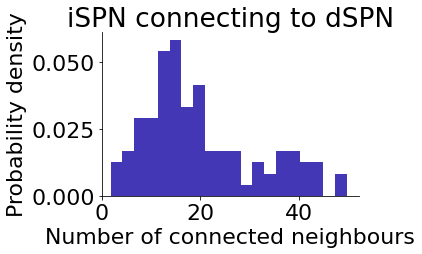

Wrote networks/simple_example/figures/Network-synapses-input-to-dSPN-from-iSPN.pdf


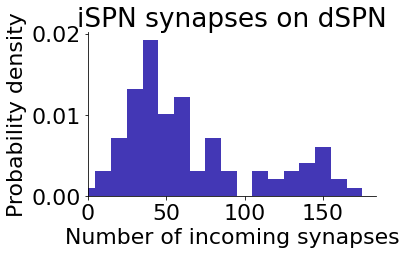

Wrote networks/simple_example/figures/Network-synapses-to-dSPN-from-iSPN.pdf


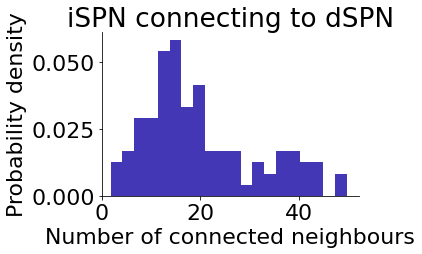

In [2]:
sa.plot_incoming_connections(neuron_type="dSPN", pre_type="iSPN", num_bins=20)





This shows the iSPN to dSPN connection probability, as a function of distance. Since this example network is contained in a small cube, we can only look at the most proximal connections. The dist_3d parameter determines if we look at the 3D distance, or the 2D distance in the x-y plane, as seen from above. We can also include experimental data by using the exp_max_dist, exp_data and exp_data_detailed. Here we have to experimental datasets, collected between 0 and 50 micrometer, and between 0 and 100 mircometers. If only the probability is known use exp_data, if the numbers of positive to total experiments are known, use exp_data_detailed. If both are given they must match. The variable y_max lets you specify the y-axis upper range.

Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 100/100
Counting connections
Requested: 10000000.0 calculated [7578.]
Rejected (too large z-depth): 2422
P(d<5e-05)=0.2871880199667221
P(d<0.0001)=0.2398274622573688


/home/hjorth/HBP/Snudda/snudda/analyse.py:1420: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


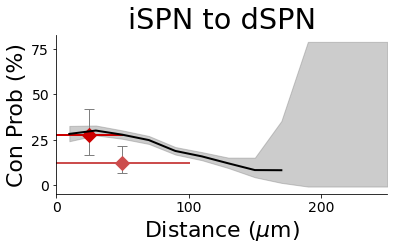

Wrote networks/simple_example/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.pdf


In [3]:
sa.plot_connection_probability("iSPN", "dSPN",
                                dist_3d=dist3D,
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data=[13 / 47.0, 10 / 80.0],
                                exp_data_detailed=[(13, 47), (10, 80)],
                                y_max=y_max_H)


Here we plot a histogram over the number of synapses between each pair of connected iSPN and dSPN.

Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in Striatum : Keeping 100/100
Calculating max synapses
Calculating mean synapses
Plotting 2110 connections


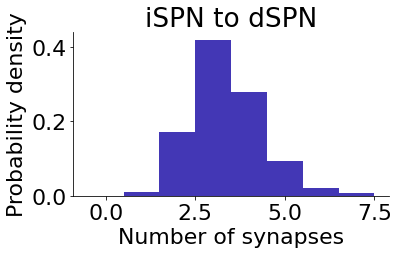

Wrote networks/simple_example/figures/Network-number-of-synapses-from-iSPN-to-dSPN-per-cell.pdf


In [4]:
sa.plot_num_synapses_per_pair("iSPN", "dSPN")
